# G. PCA

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from scipy.linalg import norm, eigh


import plotly_express as px
import seaborn as sns

data_home = 'C:/Users/user/Desktop/24Spring_ETA_Project/Dataset'
data_prefix = 'Star Wars- Episode '
output_dir = 'C:/Users/user/Desktop/24Spring_ETA_Project/Output'
path_prefix = 'starwars-combo'

max_terms = 5000

OHCO = ['movie_id', 'chap_num', 'para_num', 'sent_num', 'token_num']
SENTS = OHCO[:4]
PARAS = OHCO[:3]
CHAPS = OHCO[:2]
MOVIES = OHCO[:1]

In [2]:
TFIDF = pd.read_csv(f"{output_dir}/{path_prefix}-red_norm_TFIDF_L2_2.csv").set_index(['movie_id', 'chap_num'])
LIB = pd.read_csv(f"{output_dir}/{path_prefix}-LIB.csv").set_index('movie_id')
DTM = pd.read_csv(f"{output_dir}/{path_prefix}-DTM.csv")

In [3]:
VOCAB = pd.read_csv(f"{output_dir}/{path_prefix}-VOCAB.csv").set_index('term_str')

In [4]:
LIB

year      episode              movie_title  \
movie_id                                               
1         1999    Episode I       The Phantom Menace   
2         2002   Episode II     Attack of the Clones   
3         2005  Episode III      Revenge of the Sith   
4         1977   Episode IV               A New Hope   
5         1980    Episode V  The Empire Strikes Back   
6         1983   Episode VI       Return of the Jedi   

                           chap_regex  \
movie_id                                
1                   ^\s*(INT\.|EXT\.)   
2                   ^\s*(INT\.|EXT\.)   
3             ^\s*\d+\s+(INT\.|EXT\.)   
4         ^\s*(INTERIOR\:|EXTERIOR\:)   
5                   ^\s*(INT\.|EXT\.)   
6                 ^\s*\d+\s+(INT|EXT)   

                                           source_file_path  reviews  \
movie_id                                                               
1         C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       52   
2         C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       65   
3         C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       79   
4         C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       93   
5         C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       95   
6         C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       83   

                 writer  character_len  
movie_id                                
1                   G.L         174327  
2                   G.L         166248  
3                   G.L         177188  
4                   G.L         204053  
5         G.L, L.K, L.B         172933  
6               G.L,L.K         147118

In [5]:
VOCAB.sort_values('dfidf', ascending=False).head(10)

n         p         i  n_chars  n_tokens max_pos_group max_pos  \
term_str                                                                      
it        1459  0.008416  6.892572        2         1            PR     PRP   
as        1103  0.006363  7.296120        2         1            IN      IN   
he        1407  0.008116  6.944930        2         1            PR     PRP   
i         2409  0.013897  6.169118        1         1            NN      NN   
you       2388  0.013776  6.181750        3         1            PR     PRP   
his       1558  0.008988  6.797857        3         1            PR    PRP$   
at         891  0.005140  7.604055        2         1            IN      IN   
into       762  0.004396  7.829689        4         1            IN      IN   
with       924  0.005330  7.551588        4         1            IN      IN   
out        773  0.004459  7.809012        3         1            IN      IN   

          stop stem_porter stem_snowball  ...       dfidf   df       idf  \
term_str                                  ...                              
it           1          it            it  ...  779.644989  543  1.435810   
as           1          as            as  ...  777.906306  577  1.348191   
he           1          he            he  ...  777.527896  501  1.551952   
i            1           i             i  ...  776.561198  493  1.575175   
you          1         you           you  ...  774.759012  481  1.610726   
his          1          hi           his  ...  774.131486  606  1.277445   
at           1          at            at  ...  773.318251  473  1.634922   
into         1        into          into  ...  772.927688  471  1.641035   
with         1        with          with  ...  772.524872  469  1.647175   
out          1         out           out  ...  769.107868  454  1.694070   

          mean_tfidf        dp        di        dh      n2        p2        i2  
term_str                                                                        
it          0.128750  0.369639  1.435810  0.530732  1459.0  0.008416  6.892572  
as          0.111149  0.392784  1.348191  0.529548  1103.0  0.006363  7.296120  
he          0.137794  0.341048  1.551952  0.529291  1407.0  0.008116  6.944930  
i           0.192830  0.335602  1.575175  0.528633  2409.0  0.013897  6.169118  
you         0.191508  0.327434  1.610726  0.527406  2388.0  0.013776  6.181750  
his         0.151901  0.412526  1.277445  0.526979  1558.0  0.008988  6.797857  
at          0.100695  0.321988  1.634922  0.526425   891.0  0.005140  7.604055  
into        0.113252  0.320626  1.641035  0.526159   762.0  0.004396  7.829689  
with        0.095357  0.319265  1.647175  0.525885   924.0  0.005330  7.551588  
out         0.096164  0.309054  1.694070  0.523559   773.0  0.004459  7.809012  

[10 rows x 21 columns]

In [6]:
TFIDF

i       are        is         t        be      have  \
movie_id chap_num                                                               
1        1.0       0.000000  0.000000  0.038912  0.000000  0.022697  0.000000   
         2.0       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         3.0       0.050536  0.027328  0.000000  0.032673  0.066790  0.000000   
         4.0       0.093420  0.050520  0.035279  0.060399  0.123469  0.032268   
         5.0       0.126249  0.054618  0.000000  0.032650  0.000000  0.000000   
...                     ...       ...       ...       ...       ...       ...   
6        131.0     0.000000  0.000000  0.032471  0.000000  0.000000  0.000000   
         132.0     0.125206  0.000000  0.031522  0.053966  0.000000  0.000000   
         133.0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         134.0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
         135.0     0.000000  0.000000  0.040824  0.000000  0.000000  0.000000   

                   day   cockpit         s      star  ...  approved  counters  \
movie_id chap_num                                     ...                       
1        1.0       0.0  0.073717  0.018150  0.025793  ...       0.0       0.0   
         2.0       0.0  0.000000  0.000000  0.000000  ...       0.0       0.0   
         3.0       0.0  0.000000  0.013352  0.000000  ...       0.0       0.0   
         4.0       0.0  0.000000  0.037025  0.000000  ...       0.0       0.0   
         5.0       0.0  0.000000  0.013343  0.000000  ...       0.0       0.0   
...                ...       ...       ...       ...  ...       ...       ...   
6        131.0     0.0  0.061514  0.000000  0.193711  ...       0.0       0.0   
         132.0     0.0  0.059717  0.000000  0.125367  ...       0.0       0.0   
         133.0     0.0  0.000000  0.020292  0.057674  ...       0.0       0.0   
         134.0     0.0  0.000000  0.023223  0.000000  ...       0.0       0.0   
         135.0     0.0  0.000000  0.014281  0.040591  ...       0.0       0.0   

                   repeating  disappointed  tightening  unconsciousness  \
movie_id chap_num                                                         
1        1.0             0.0           0.0         0.0              0.0   
         2.0             0.0           0.0         0.0              0.0   
         3.0             0.0           0.0         0.0              0.0   
         4.0             0.0           0.0         0.0              0.0   
         5.0             0.0           0.0         0.0              0.0   
...                      ...           ...         ...              ...   
6        131.0           0.0           0.0         0.0              0.0   
         132.0           0.0           0.0         0.0              0.0   
         133.0           0.0           0.0         0.0              0.0   
         134.0           0.0           0.0         0.0              0.0   
         135.0           0.0           0.0         0.0              0.0   

                   fearsome  shuffles  groan  baggy  
movie_id chap_num                                    
1        1.0            0.0       0.0    0.0    0.0  
         2.0            0.0       0.0    0.0    0.0  
         3.0            0.0       0.0    0.0    0.0  
         4.0            0.0       0.0    0.0    0.0  
         5.0            0.0       0.0    0.0    0.0  
...                     ...       ...    ...    ...  
6        131.0          0.0       0.0    0.0    0.0  
         132.0          0.0       0.0    0.0    0.0  
         133.0          0.0       0.0    0.0    0.0  
         134.0          0.0       0.0    0.0    0.0  
         135.0          0.0       0.0    0.0    0.0  

[1469 rows x 5000 columns]

In [7]:
# Tried filtering only the Nouns, however, since star wars terms' POS aren't very clearly defined with nltk, multiple NNPS shows up in NNPS
# Therefore I won't filter out only the nouns, rather use the whole VOCAB

In [8]:
# FILTER VOCAB
# VIDX = VOCAB[VOCAB.max_pos.isin(['NN','NNS'])].sort_values('dfidf', ascending=False).head(max_terms).index
# VIDX = VIDX.intersection(TFIDF.columns)
# VOCAB.loc[VIDX].sort_index()

In [9]:
# TFIDF[VIDX]

## PCA

In [10]:
def get_pca(TFIDF, 
            k=10, 
            norm_docs=True,
            # norm_level=2,
            center_by_mean=True, 
            center_by_variance=False):
    
    # if TFIDF.isna().sum().sum():
    #     print("Filled NA")
    #     TFIDF = TFIDF.fillna(0)
    
    if norm_docs:
        # TFIDF = TFIDF.apply(lambda x: x / norm(x), 1).fillna(0)
        TFIDF = (TFIDF.T / norm(TFIDF, 2, axis=1)).T
    
    if center_by_mean:
        TFIDF = TFIDF - TFIDF.mean()
        
    if center_by_variance:
        TFIDF = TFIDF / TFIDF.std()        

    COV = TFIDF.cov()

    eig_vals, eig_vecs = eigh(COV)
    
    EIG_VEC = pd.DataFrame(eig_vecs, index=COV.index, columns=COV.index)
    EIG_VAL = pd.DataFrame(eig_vals, index=COV.index, columns=['eig_val'])
    EIG_VAL.index.name = 'term_str'
        
    EIG_IDX = EIG_VAL.eig_val.sort_values(ascending=False).head(k)
    
    COMPS = EIG_VEC[EIG_IDX.index].T
    COMPS.index = [i for i in range(COMPS.shape[0])]
    COMPS.index.name = 'pc_id'
    

    LOADINGS = COMPS.T

    DCM = TFIDF.dot(LOADINGS)
    
    COMPINF = pd.DataFrame(index=COMPS.index)

    for i in range(k):
        for j in [0, 1]:
            top_terms = ' '.join(LOADINGS.sort_values(i, ascending=bool(j)).head(5).index.to_list())
            COMPINF.loc[i, j] = top_terms
    COMPINF = COMPINF.rename(columns={0:'pos', 1:'neg'})
    
    COMPINF['eig_val'] = EIG_IDX.reset_index(drop=True).to_frame()
    COMPINF['exp_var'] = COMPINF.eig_val / COMPINF.eig_val.sum()
    
    return LOADINGS, DCM, COMPINF

In [11]:
LOADINGS, DCM, COMPINF = get_pca(TFIDF, 
                                 norm_docs=False,  #tfidf already normalized
                                 # norm_level=2, 
                                 center_by_mean=False, 
                                 center_by_variance=False)

## PCA Components

In [12]:
COMPINF

pos  \
pc_id                                             
0                    star death red leader wing   
1               leader red cockpit gold headset   
2      falcon millennium cruiser space asteroid   
3                  red leader star death trench   
4                   falcon tie millennium i red   
5                gold y falcon rogue millennium   
6             gold tie space cruiser federation   
7         coruscant landing naboo bail platform   
8             rogue snowspeeder tie comlink zev   
9               tie jedi clone emperor fighters   

                                            neg   eig_val   exp_var  
pc_id                                                                
0                              i jedi t is have  0.018026  0.192197  
1                  star death tie space surface  0.014788  0.157671  
2                        i death star surface x  0.009959  0.106187  
3                    x wing fighter cockpit tie  0.009582  0.102164  
4               wing x gold federation elevator  0.008357  0.089104  
5                         red fighter x ten tie  0.007535  0.080336  
6         rogue snowspeeder hoth comlink trench  0.007000  0.074638  
7      elevator cruiser trade federation bridge  0.006692  0.071348  
8               falcon millennium gold red wing  0.006127  0.065329  
9               panaka capt naboo spacecraft fx  0.005723  0.061024

In [13]:
# x => x-wing
# y => y-wing
# t => t-14, t-65, etc

## PCA DCM

In [14]:
pca_engine = PCA(n_components=10)

In [15]:
DCM = pd.DataFrame(pca_engine.fit_transform(TFIDF.fillna(0)), index=TFIDF.index)
DCM.columns = ['PC{}'.format(i) for i in DCM.columns]
DCM = DCM.join(LIB[['episode','year','reviews']], on='movie_id')
DCM

PC0       PC1       PC2       PC3       PC4       PC5  \
movie_id chap_num                                                               
1        1.0      -0.067347 -0.016779 -0.036159 -0.023568 -0.063310 -0.065998   
         2.0      -0.010715 -0.086057 -0.135630 -0.042267 -0.092828 -0.080047   
         3.0      -0.075737 -0.016634 -0.005523 -0.029749 -0.036227 -0.026360   
         4.0      -0.138936  0.018817  0.087822 -0.014685  0.003261 -0.033034   
         5.0      -0.118007  0.018667  0.065133 -0.019268 -0.012930 -0.022639   
...                     ...       ...       ...       ...       ...       ...   
6        131.0     0.191144 -0.160096  0.059783 -0.003886  0.009628  0.054644   
         132.0     0.131546  0.019189  0.085985  0.051719  0.105641  0.193899   
         133.0    -0.005028 -0.050064 -0.022423 -0.029482 -0.005110  0.023265   
         134.0    -0.003337 -0.036469 -0.041954 -0.028420 -0.017412  0.004213   
         135.0    -0.032406 -0.016230 -0.021322 -0.019607 -0.023700  0.006840   

                        PC6       PC7       PC8       PC9     episode  year  \
movie_id chap_num                                                             
1        1.0       0.146553  0.088389  0.014972  0.043209   Episode I  1999   
         2.0       0.152375  0.111412  0.065315  0.102465   Episode I  1999   
         3.0       0.061055  0.087401  0.026131  0.028097   Episode I  1999   
         4.0       0.066773  0.033049  0.003989 -0.001344   Episode I  1999   
         5.0       0.066072  0.009804 -0.023992 -0.026015   Episode I  1999   
...                     ...       ...       ...       ...         ...   ...   
6        131.0    -0.064955  0.070092 -0.092793  0.059403  Episode VI  1983   
         132.0     0.015041  0.076684 -0.050897  0.067875  Episode VI  1983   
         133.0    -0.042890  0.016340 -0.038317 -0.010809  Episode VI  1983   
         134.0    -0.028890 -0.040023 -0.010806 -0.054518  Episode VI  1983   
         135.0    -0.033752 -0.020929 -0.019082 -0.013711  Episode VI  1983   

                   reviews  
movie_id chap_num           
1        1.0            52  
         2.0            52  
         3.0            52  
         4.0            52  
         5.0            52  
...                    ...  
6        131.0          83  
         132.0          83  
         133.0          83  
         134.0          83  
         135.0          83  

[1469 rows x 13 columns]

## PCA Loadings

In [16]:
LOADINGS

pc_id                   0         1         2         3         4         5  \
term_str                                                                      
i               -0.200654  0.093371 -0.390794 -0.035700  0.262817  0.055632   
are             -0.062882  0.013710 -0.064518  0.009090  0.019157 -0.006311   
is              -0.085004  0.022759 -0.102950  0.014353  0.052199  0.003777   
t               -0.091197  0.036997 -0.167618 -0.031331  0.118306  0.022860   
be              -0.070932  0.016944 -0.109203  0.002851  0.050670 -0.009618   
...                   ...       ...       ...       ...       ...       ...   
unconsciousness -0.000837  0.000035  0.001017 -0.000241 -0.001055 -0.000086   
fearsome        -0.000680 -0.000319 -0.000226  0.000770 -0.000341  0.000216   
shuffles        -0.000994  0.000296 -0.001771 -0.000097  0.001157  0.000404   
groan           -0.000798  0.000080 -0.000541  0.000180 -0.000305 -0.000132   
baggy           -0.000417 -0.000386  0.000304  0.000631  0.000101  0.000475   

pc_id                   6         7         8         9  
term_str                                                 
i                0.053003 -0.070460  0.090999 -0.018144  
are              0.022184 -0.024838 -0.013003 -0.014339  
is               0.031389 -0.006300 -0.027512  0.035138  
t                0.019268 -0.063545  0.023424 -0.026289  
be               0.030953 -0.018769 -0.002037  0.006907  
...                   ...       ...       ...       ...  
unconsciousness -0.001301  0.002552 -0.000696 -0.000043  
fearsome        -0.000685 -0.001179 -0.000905  0.001367  
shuffles        -0.000119  0.000197  0.000585 -0.000118  
groan           -0.000342  0.000392 -0.000613  0.002154  
baggy           -0.000661 -0.001222 -0.001796  0.000990  

[5000 rows x 10 columns]

In [17]:
## Create DOC

In [18]:
DOC = pd.DataFrame(index=TFIDF.index).join(LIB)
DOC['label'] = DOC.apply(lambda x: f"{x.episode} - {x.movie_title} - Scene {int(x.name[1])}", 1)

In [19]:
DOC

year     episode         movie_title           chap_regex  \
movie_id chap_num                                                              
1        1.0       1999   Episode I  The Phantom Menace    ^\s*(INT\.|EXT\.)   
         2.0       1999   Episode I  The Phantom Menace    ^\s*(INT\.|EXT\.)   
         3.0       1999   Episode I  The Phantom Menace    ^\s*(INT\.|EXT\.)   
         4.0       1999   Episode I  The Phantom Menace    ^\s*(INT\.|EXT\.)   
         5.0       1999   Episode I  The Phantom Menace    ^\s*(INT\.|EXT\.)   
...                 ...         ...                 ...                  ...   
6        131.0     1983  Episode VI  Return of the Jedi  ^\s*\d+\s+(INT|EXT)   
         132.0     1983  Episode VI  Return of the Jedi  ^\s*\d+\s+(INT|EXT)   
         133.0     1983  Episode VI  Return of the Jedi  ^\s*\d+\s+(INT|EXT)   
         134.0     1983  Episode VI  Return of the Jedi  ^\s*\d+\s+(INT|EXT)   
         135.0     1983  Episode VI  Return of the Jedi  ^\s*\d+\s+(INT|EXT)   

                                                    source_file_path  reviews  \
movie_id chap_num                                                               
1        1.0       C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       52   
         2.0       C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       52   
         3.0       C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       52   
         4.0       C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       52   
         5.0       C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       52   
...                                                              ...      ...   
6        131.0     C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       83   
         132.0     C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       83   
         133.0     C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       83   
         134.0     C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       83   
         135.0     C:/Users/user/Desktop/24Spring_ETA_Project/Dat...       83   

                    writer  character_len  \
movie_id chap_num                           
1        1.0           G.L         174327   
         2.0           G.L         174327   
         3.0           G.L         174327   
         4.0           G.L         174327   
         5.0           G.L         174327   
...                    ...            ...   
6        131.0     G.L,L.K         147118   
         132.0     G.L,L.K         147118   
         133.0     G.L,L.K         147118   
         134.0     G.L,L.K         147118   
         135.0     G.L,L.K         147118   

                                                         label  
movie_id chap_num                                               
1        1.0          Episode I - The Phantom Menace - Scene 1  
         2.0          Episode I - The Phantom Menace - Scene 2  
         3.0          Episode I - The Phantom Menace - Scene 3  
         4.0          Episode I - The Phantom Menace - Scene 4  
         5.0          Episode I - The Phantom Menace - Scene 5  
...                                                        ...  
6        131.0     Episode VI - Return of the Jedi - Scene 131  
         132.0     Episode VI - Return of the Jedi - Scene 132  
         133.0     Episode VI - Return of the Jedi - Scene 133  
         134.0     Episode VI - Return of the Jedi - Scene 134  
         135.0     Episode VI - Return of the Jedi - Scene 135  

[1469 rows x 9 columns]

## PCA Visualization 1
**PC 0&1**
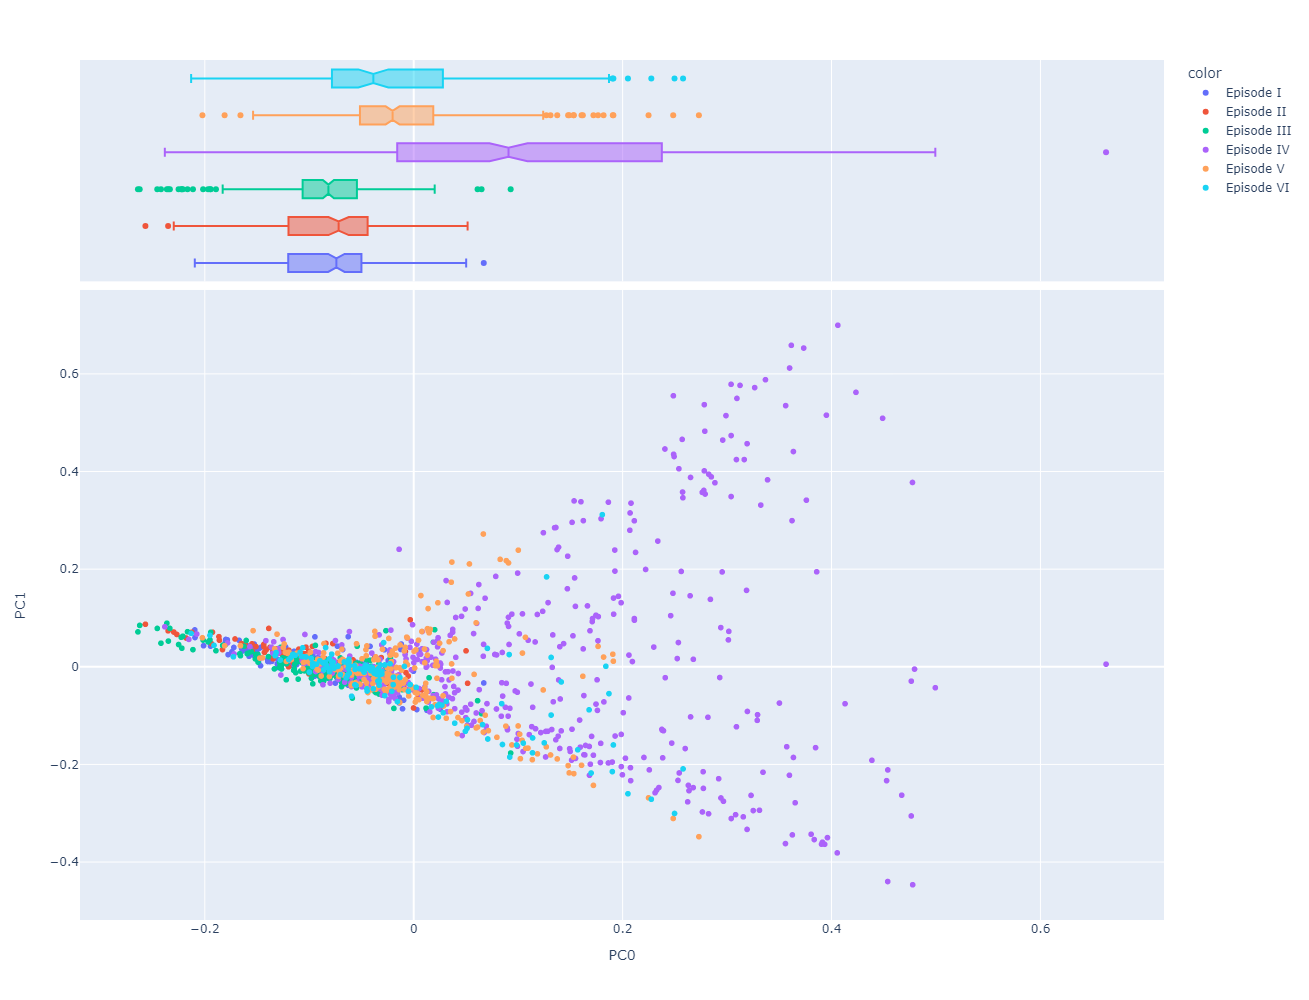
**LOADING 0&1**
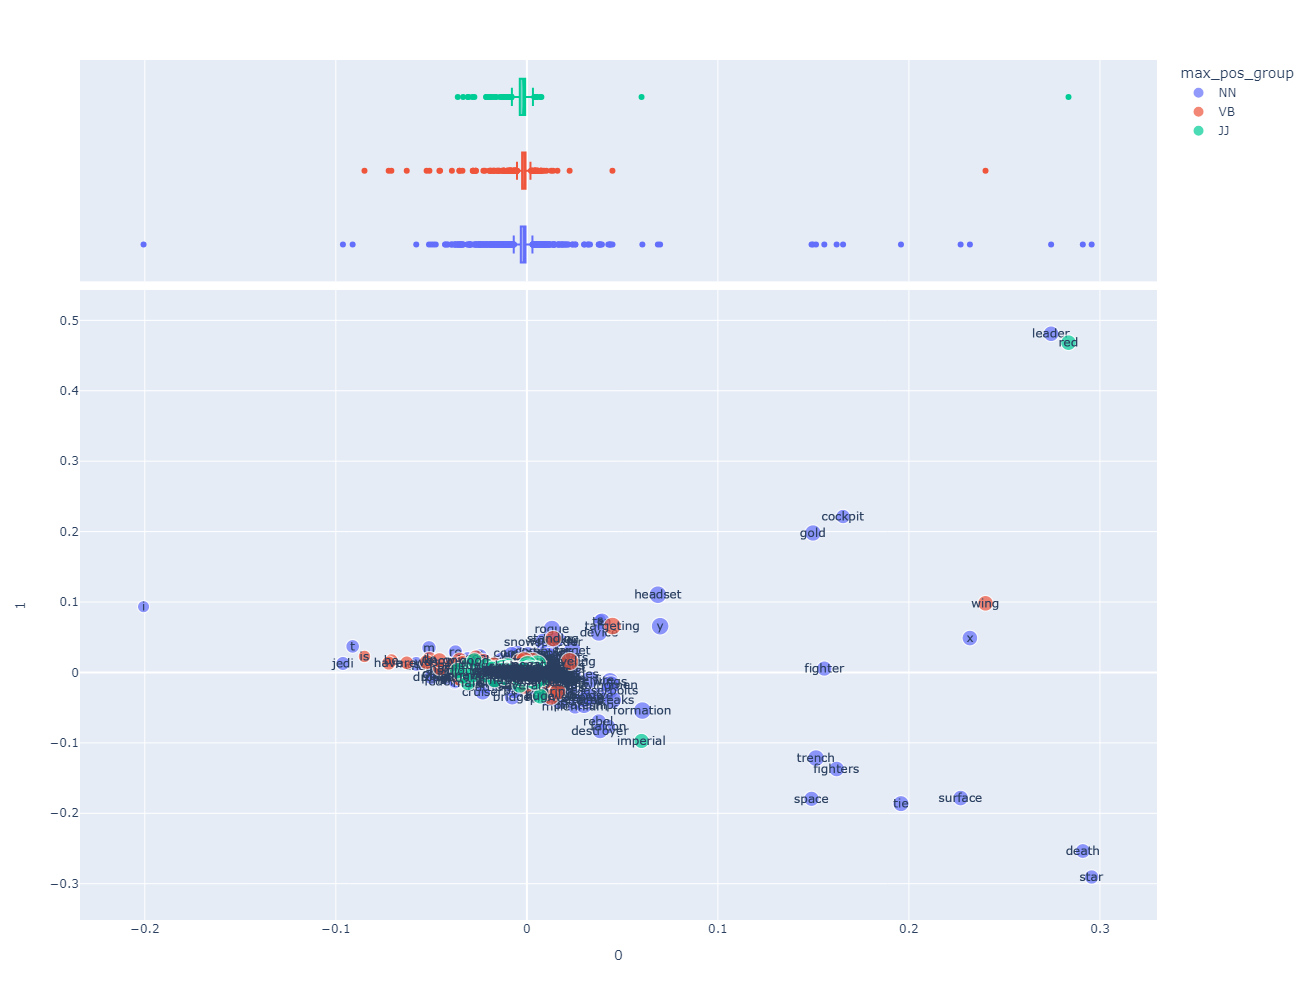

In [27]:
def vis_pcs(M, a, b, label=DOC.episode, hover_name=DOC.label, symbol=None, size=None):
    return px.scatter(M, f"PC{a}", f"PC{b}", color=label, hover_name=hover_name, 
                     symbol=symbol, size=size,
                     marginal_x='box', height=1000)

In [28]:
def vis_loadings(a=0, b=1, hover_name='term_str'):
    X = LOADINGS.join(VOCAB)
    return px.scatter(X.reset_index(), a, b, 
                      text='term_str', size='i', color='max_pos_group', 
                      marginal_x='box', height=1000)

                      # size='df', 
                      # color='dfidf',

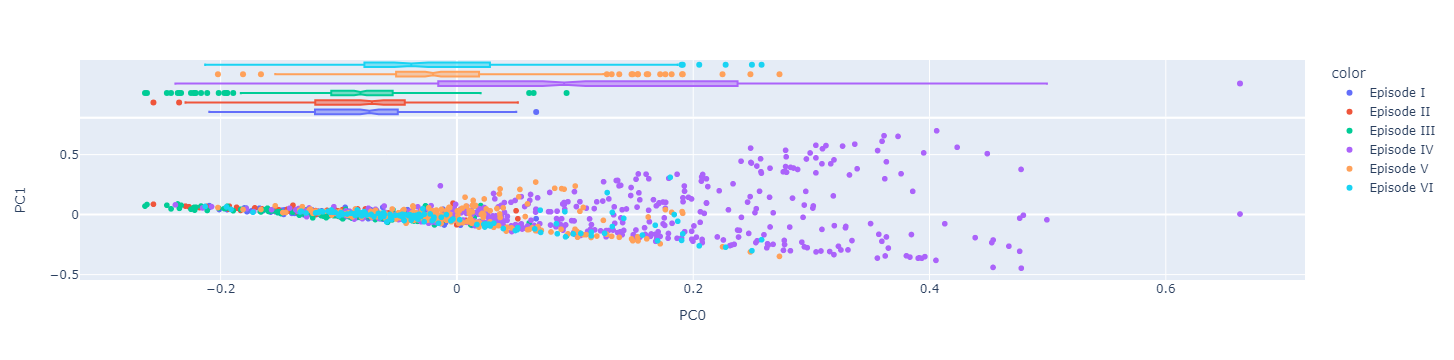

In [29]:
vis_pcs(DCM, 0, 1)

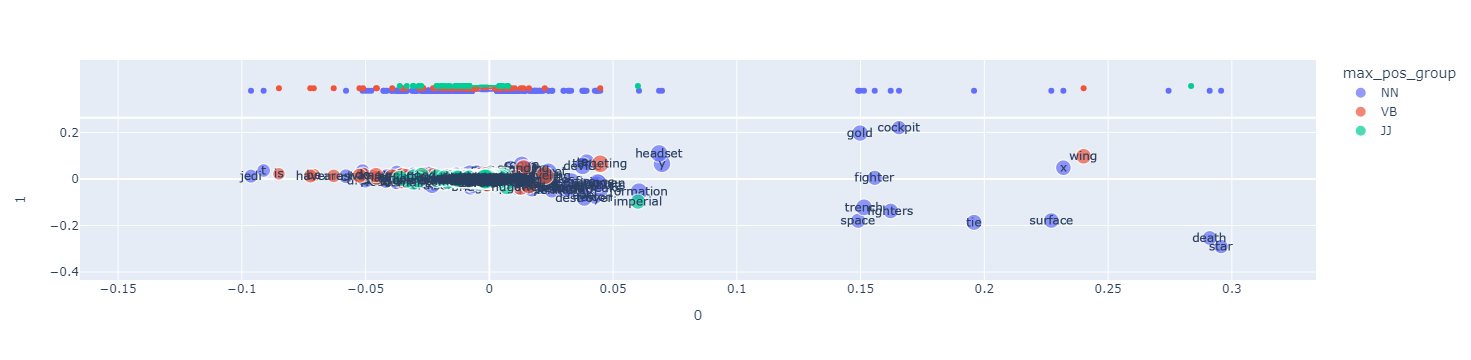

In [30]:
vis_loadings(a=0, b=1, hover_name='term_str')

## PCA Visualization 2
**PC 2&3**
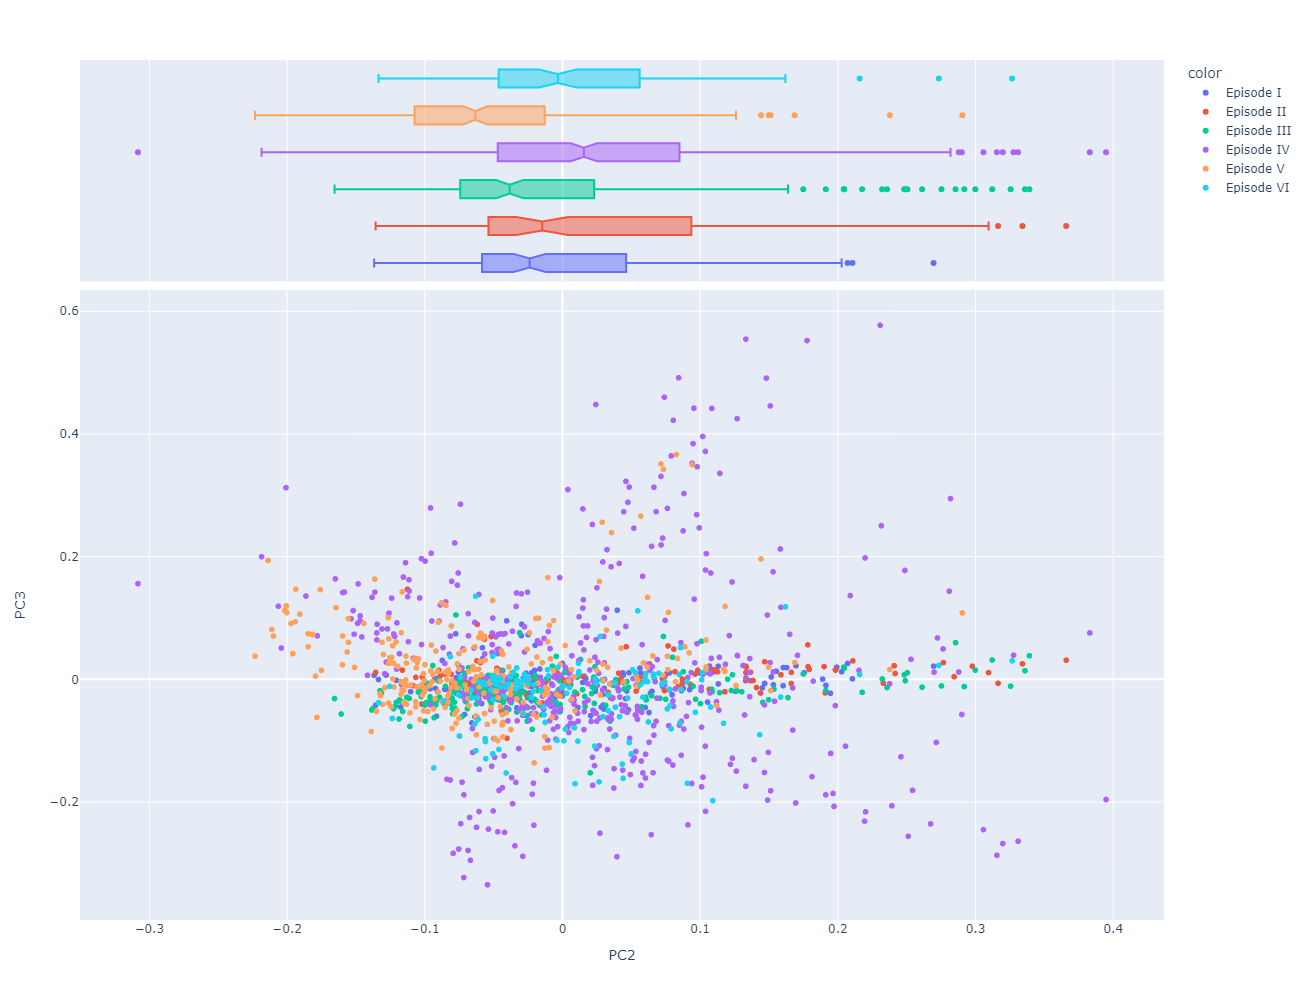
**Loading 2&3**
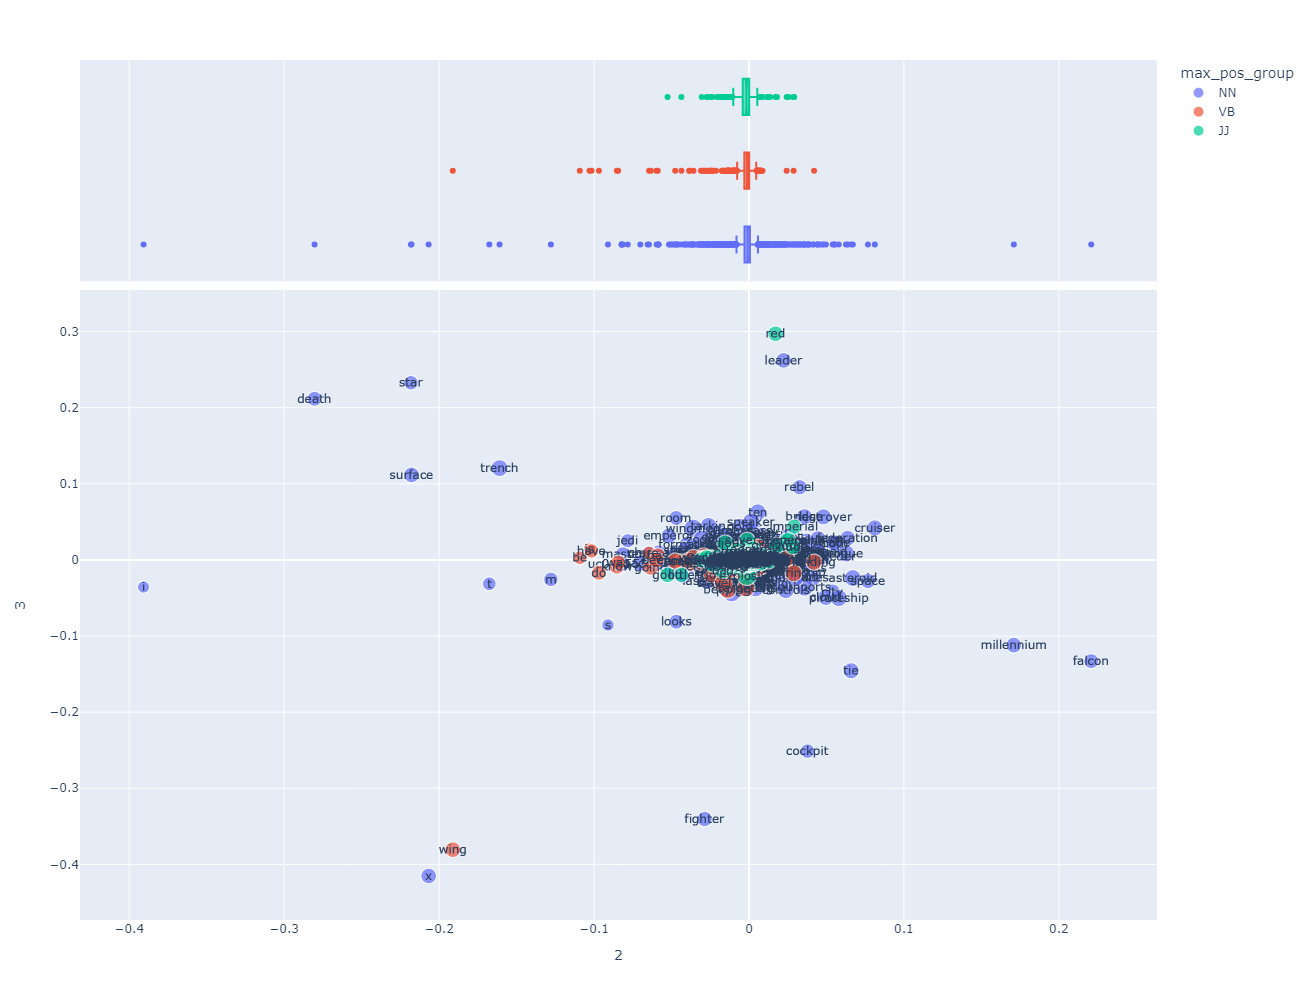

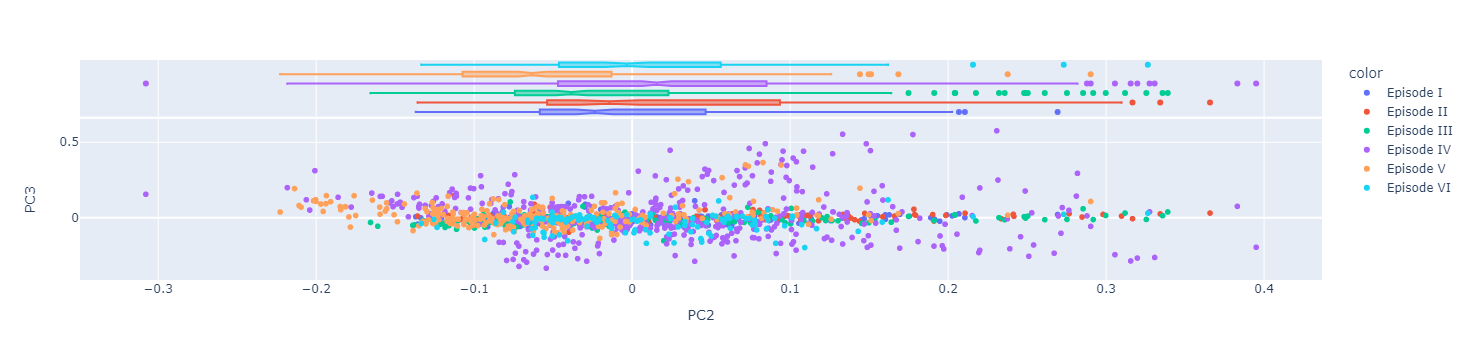

In [31]:
# Docs PC 2 and 3 Episode
vis_pcs(DCM, 2, 3)

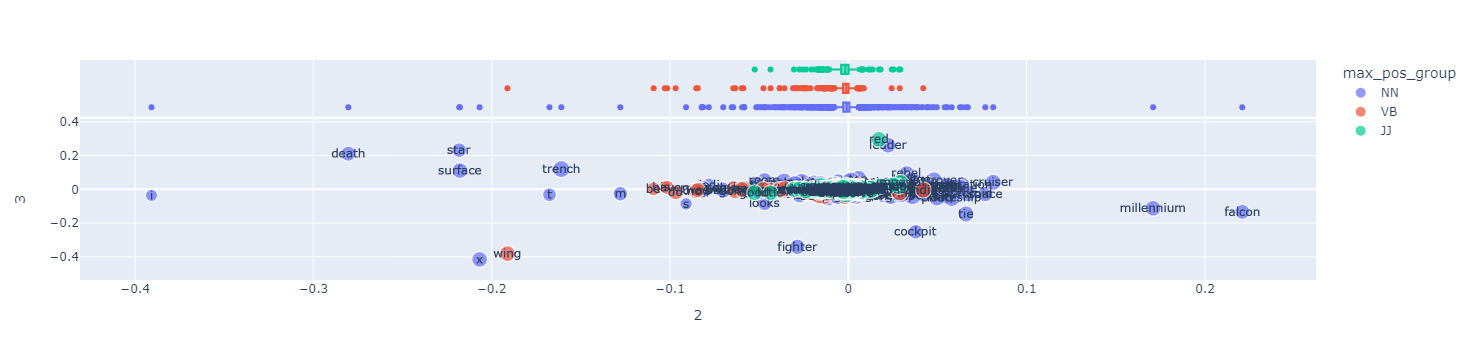

In [32]:
vis_loadings(a=2, b=3, hover_name='term_str')

# Save

In [26]:
LOADINGS.to_csv(f"{output_dir}/{path_prefix}-LOADINGS.csv", index=True)
DCM.to_csv(f"{output_dir}/{path_prefix}-DCM.csv", index=True)
COMPINF.to_csv(f"{output_dir}/{path_prefix}-PCA_Components.csv", index=True)
DOC.to_csv(f"{output_dir}/{path_prefix}-DOC.csv", index=True)